In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

https://www.analyticsvidhya.com/blog/2020/11/lasso-regression-causes-sparsity-while-ridge-regression-doesnt-unfolding-the-math/

<h2>Polynomial Regression </h2>

In statistics , polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.In Machine learning the polynomial regression is just the extended Linear Regression.This extension we achieve by the tranform the dataset as will shown below. 

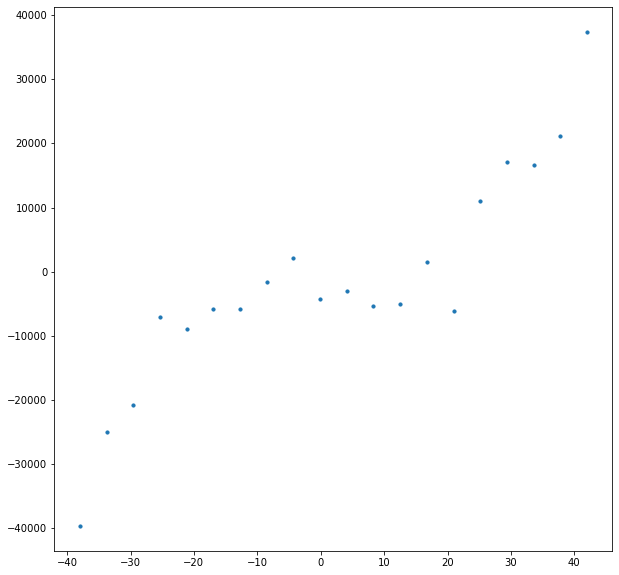

In [51]:
#plt.rcParams["figure.figsize"] = (5,5)
np.random.seed(0)
x = 2 - np.linspace(-10,10,num=20) *4    #np.linspace(-10,10,num=10)  
y = x - 2 * (x ** 2) + 0.5 * (x ** 3)  +100*np.random.normal(-50, 50, size=x.size)  
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

In [19]:
model =  LinearRegression()
z = model.fit(x,y)
y_pred = model.predict(x)

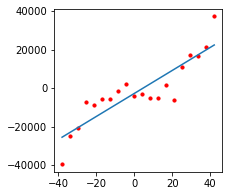

In [20]:
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')

We can see that the straight line is unable to capture the patterns in the data. This is an example of <mark>under-fitting</mark> or <mark>High-Bias</mark>.  Computing the RMSE and R²-score of the linear line gives :

In [21]:
model.score(x,y)

0.7767230510045652


Using the straight line model we achieve $R^2 = 77$% accuracy.To reach a more accurately result we can improve the model by increasing the complexity using higher order equation.We can add powers of of the original features as new features.


We can add new features to the dataset, which are just the  $𝑛_{𝑡ℎ}$  degree polynomial in existing ones.
$$X = \begin{bmatrix} 
 x_1 \\
\vdots   \\
 x_n \\
\end{bmatrix} -- >  
X_{polyData} = T(X) = \begin{bmatrix} 
1 &x_1 & x_1^2 & \dots & x_1^p \\
\vdots & \ddots &  \ddots & \vdots & \vdots \\
1& x_n & x_n^2  & \dots & x_n^p \\
\end{bmatrix} $$

The new Dataset 𝑇(𝑋) can be trained in Multiple Linear regression and the weights we achieve will correspond to in $w_p $ in $Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$

In [22]:
polynomial_features= PolynomialFeatures(degree=2)


Example of tranformation of dataset 

In [23]:
polynomial_features.fit_transform(np.array([[1],[2],[3]]))

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

 $$X = \begin{bmatrix} 
 1 \\
 2   \\
 3 \\
\end{bmatrix} -- >  
X_{polyData} = T(X) = \begin{bmatrix} 
1 & 1 & 1   \\
2 & 2 &  4 \\
1& 3 & 9 \\
\end{bmatrix} $$ T(X) 2 degree

Let's returned back to out dataset 

We see that if we using linear eqaution the result is underfitting,Let's compare the 1,2,3 degree polynomial.

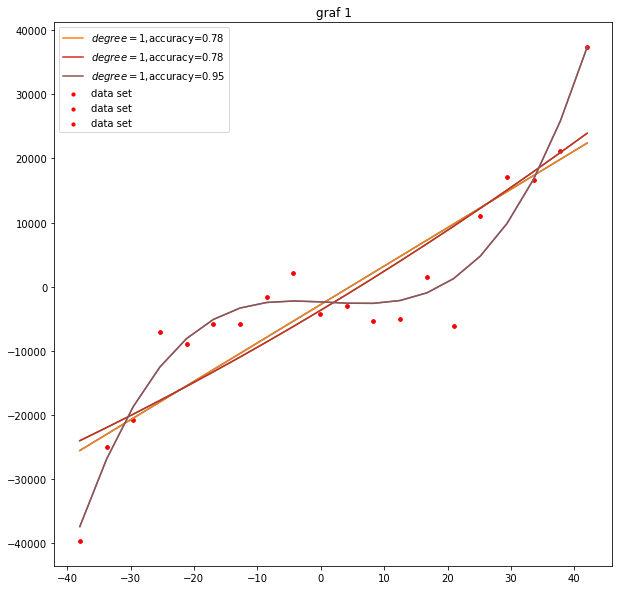

In [28]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)
def polynomial_tranform(X,degree):
    '''
    applying standard scaler and transform data into polynomial     
    '''
    x_data = PolynomialFeatures(degree=degree).fit_transform(X)   
    return StandardScaler().fit_transform(x_data)

plt.rcParams["figure.figsize"] = (10,10)
for degree in 1,2,3:
    x_poly = polynomial_tranform(x,degree)
    model = LinearRegression().fit(x_poly,y)
    y_pred = model.predict(x_poly)
    plt.plot(x, y_pred)
    plt.plot(x, y_pred,label="$degree = {}$,accuracy={:.2f}".format(i,model.score(x_poly,y)))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    plt.title('graf 1')
    plt.legend()
plt.show()   

In [25]:
def poly_regression(degree,x):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = scaler.fit_transform(x)
    x_poly = polynomial_features.fit_transform(x_poly)
    model =  LinearRegression()
   
    y_pred,model.predict(x_poly)
    return model,y_pred,model.score(x_poly,y)

In [26]:
#fig, axs = plt.subplots(size, size,figsize=(25,25)) 
plt.rcParams["figure.figsize"] = (10,10)
for i in 1,2,3:
    plt.figsize=(50,50)
    print(i)
    linear_model,y_pred,score =  poly_regression(i,x)
    plt.plot(x, y_pred)
    plt.plot(x, y_pred,label="$n^{}$,score={:.2f}".format(i,scor))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    #plt.legend()
plt.show()    

1


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
for i in 1,3,25:
    plt.figsize=(50,50)
    y_pred,scor = poly_regression(i,x)
    plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    plt.legend()
plt.show()    

For degree=25 the model fits training data too much well 100% accuracy that is the very bad sign.In general this means the biases or  noise is captured too, that is called <mark>over-fitting</mark> or <mark>Low-Bias and high -variance</mark> .This is also mean that the model will fail for new unseen data.

<h2>Bias and Variance</h2>

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.<br> <br>
Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.


In [ ]:
plt.rcParams["figure.figsize"] = (3,3)
y_pred,scor = poly_regression(1)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

In case when degree=1 it called has high Bias and low variance or Underfit.

In [ ]:
plt.rcParams["figure.figsize"] = (3,3)
y_pred,scor = poly_regression(3)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

In case when degree=3 that is correct fit,that has low bais and low variance.

In [17]:
plt.rcParams["figure.figsize"] = (3,3)
linear_model = poly_regression(1)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

TypeError: poly_regression() missing 1 required positional argument: 'x'

In case when degree=25 that is overfit,that has low bais and high variance.

<h2> Some notes PCA </h2>

In [92]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly =  polynomial_features.fit_transform(x)

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

pca = PCA(1)
x_tranform= pca.fit_transform(x_poly)
x_tranform.shape

(20, 1)

In [78]:
x_poly
x

array([[ 42.        ],
       [ 37.78947368],
       [ 33.57894737],
       [ 29.36842105],
       [ 25.15789474],
       [ 20.94736842],
       [ 16.73684211],
       [ 12.52631579],
       [  8.31578947],
       [  4.10526316],
       [ -0.10526316],
       [ -4.31578947],
       [ -8.52631579],
       [-12.73684211],
       [-16.94736842],
       [-21.15789474],
       [-25.36842105],
       [-29.57894737],
       [-33.78947368],
       [-38.        ]])

In [94]:
model = LinearRegression().fit(x_poly,y)
y_pred_1 = model.predict(x_poly)

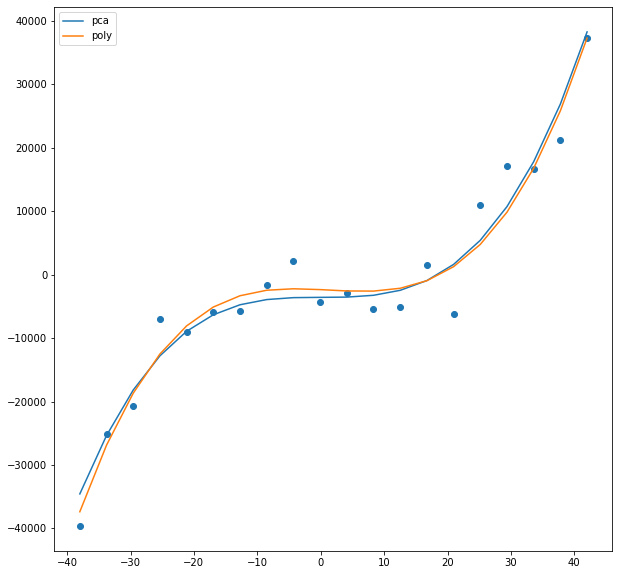

In [95]:
model = LinearRegression().fit(x_tranform,y)
y_pred = model.predict(x_tranform)
plt.plot(x, y_pred,label='pca')
plt.plot(x, y_pred_1,label='poly')
plt.scatter(x, y)
plt.legend()


In [47]:
print(pca.explained_variance_)

[4.26215222e+63]


In [48]:
pca.singular_values_

array([2.84571418e+32])

Ideally, a machine learning model should have low variance and low bias.Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

<img src='https://randlow.github.io/images/ml/tradeoff_cost_bias.png' alt="Italian Trulli">

<h2> Lasso Regression </h2>

In [ ]:
linear_model = poly_regression(10)
y_predi = linear_model.predict(x_poly)

In [ ]:
lasso_model =  Lasso(alpha=0)
lasso_model.fit(x_poly,y ) 
y_pred_lasso = lasso_model.predict(x_poly)

In [ ]:
#plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.plot(x, y_pred_lasso,label='lasso')
plt.plot(x, y_pred,label = 'linear')
plt.legend()

In [ ]:
lasso_model.coef_
plt.scatter(np.linspace(start=0,stop=25,num=len(lasso_model.coef_) ),lasso_model.coef_)
#plt.plot(np.linspace(start=0,stop=25,num=len(linear_model.coef_) ),(linear_model.coef_)/10**10,color='r')
plt.scatter(np.linspace(start=0,stop=25,num=linear_model.coef_.size ),(linear_model.coef_)/10**5,color='r')

In [ ]:
key = []
for i in range(26):
    key.append('w_'+str(i))


In [ ]:
linear_model.coef_.size
len(key)
linear_model.coef_/10**8

In [ ]:
plt.bar(key , lasso_model.coef_, color ='maroon',width = 0.4)
#plt.bar(key , linear_model.coef_/10**10, color ='red')
  

In [ ]:
linear_model.coef_.size
lasso_model.coef_.size

In [ ]:
model =  Ridge(alpha=30)
model.fit(x_poly,y ) 
y_pred_ridge = model.predict(x_poly)

In [ ]:
plt.scatter(x,y, s=10,color='r')
plt.plot(x, y_pred_ridge)


In [ ]:
#pd.DataFrame(np.cov(x_poly))
covMatrix = np.cov(x_poly)
import seaborn as sn
plt.rcParams["figure.figsize"] = (10,10)
sn.heatmap(covMatrix)
sn.heatmap(np.corrcoef(x_poly))